### Это всё тот же файл, что и в предыдущих заданиях. Задание по Word Embeddings находится в конце

In [1]:
%pip install -Uq pymorphy2 nltk wordcloud matplotlib pandas plotly spacy 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import pymorphy2
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

regexp = nltk.tokenize.RegexpTokenizer("\w+")
# treebank = nltk.tokenize.TreebankWordTokenizer()
# whitespace = nltk.tokenize.WhitespaceTokenizer()
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to /home/mickey-
[nltk_data]     pech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin = {}
# noise = ["ничего", "нечего", "тому", "той", "тем", "своей", "своих", "своего", "своей", "не", "он", "его", "него", "нему", "ему", "она", "неё", "нее", "её", "ее", "ней", "ей", "они", "их", "им", "ним", "из", "только", "этой", "ты", "ни", "а", "и", "в", "то", "от", "с", "все", "что", "же", "был", "было", "была", "как", "к", "когда", "за", "но", "на", "да", "нет", "у", "уже", "так", "чтобы", "по", "о", "я", "ну", "вот", "того", "кто", "вы", "это", "есть", "еще", "до", "во", "назад", "тебе", "вам", "вас", "мне", "меня", "до", "для", "если", "или", "со", "под"]
noise = stopwords.words()

for filename, name in files.items():
    with open(filename, "r") as file:
        # kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read()) if word.lower() not in noise]})
        kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read())]})

In [4]:
nlp = spacy.load('ru_core_news_sm')

In [5]:
with open("./Texts/granatovy_braslet.txt", "r") as f:
    doc = nlp(f.read())

In [6]:
words = [token.text for token in doc]
words_filtered = [token.text for token in doc if not token.is_punct and not token.is_stop]
words_filtered

['середине',
 'августа',
 'рождением',
 'молодого',
 'месяца',
 'наступили',
 'отвратительные',
 'погоды',
 'свойственны',
 'северному',
 'побережью',
 'Черного',
 'моря',
 'целым',
 'суткам',
 'тяжело',
 'лежал',
 'землею',
 'морем',
 'густой',
 'туман',
 'огромная',
 'сирена',
 'маяке',
 'ревела',
 'днем',
 'ночью',
 'бешеный',
 'бык',
 'утра',
 'утра',
 'шел',
 'переставая',
 'мелкий',
 'водяная',
 'пыль',
 'дождик',
 'превращавший',
 'глинистые',
 'дороги',
 'тропинки',
 'сплошную',
 'густую',
 'грязь',
 'увязали',
 'надолго',
 'возы',
 'экипажи',
 '\n\n\n\n\n\n',
 '\n\n\n\n',
 'Александр',
 'КупринI',
 '\n\n',
 'II',
 '\n\n',
 'III',
 '\n\n',
 'IV',
 '\n\n',
 'V',
 '\n\n',
 'VI',
 '\n\n',
 'VII',
 '\n\n',
 'VIII',
 '\n\n',
 'IX',
 '\n\n',
 '\n\n',
 'XI',
 '\n\n',
 'XII',
 '\n\n',
 'XIII',
 '\n\n\n\n\n\n',
 'notes1',
 '\n\n',
 '2',
 '\n\n\n\n\n\n',
 '\n\n\n\n\n\n',
 'Александр',
 'Куприн',
 '\n\n',
 'Гранатовый',
 'браслет',
 '\n\n\n\n\n',
 'L.',
 'van',
 'Beethoven',
 '2',
 'Son',

In [7]:
print(len(words), len(words_filtered), f"{(len(words_filtered)/len(words)):.2%}", sep="\n\n")

18764

8165

43.51%


### То же самое но через NLTK

In [8]:
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords

with open("./Texts/granatovy_braslet.txt") as file:
    words = word_tokenize(file.read())
    stop = stopwords.words("russian")
    words_filtered = [word for word in words if word not in stop]

[nltk_data] Downloading package punkt to /home/mickey-
[nltk_data]     pech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
print(len(words), len(words_filtered), f"{(len(words_filtered)/len(words)):.2%}", sep="\n\n")

17864

13359

74.78%


In [10]:
print(len(kuprin["Белый Пудель"]), len([word for word in kuprin["Белый Пудель"] if word not in noise]), f"Осталось {len([word for word in kuprin['Белый Пудель'] if word not in noise])/len(kuprin['Белый Пудель']):.2%}", sep="\n\n")

9316

6061

Осталось 65.06%


## Морфологический анализ

In [11]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin = {}
nlp = spacy.load('ru_core_news_sm')
# noise = ["ничего", "нечего", "тому", "той", "тем", "своей", "своих", "своего", "своей", "не", "он", "его", "него", "нему", "ему", "она", "неё", "нее", "её", "ее", "ней", "ей", "они", "их", "им", "ним", "из", "только", "этой", "ты", "ни", "а", "и", "в", "то", "от", "с", "все", "что", "же", "был", "было", "была", "как", "к", "когда", "за", "но", "на", "да", "нет", "у", "уже", "так", "чтобы", "по", "о", "я", "ну", "вот", "того", "кто", "вы", "это", "есть", "еще", "до", "во", "назад", "тебе", "вам", "вас", "мне", "меня", "до", "для", "если", "или", "со", "под"]

for filename, name in files.items():
    with open(filename, "r") as file:
        # kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read()) if word.lower() not in noise]})
        kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read())]})

In [12]:
kuprin["Белый Пудель"][10:120]

['вдоль',
 'южного',
 'берега',
 'крыма',
 'маленькая',
 'бродячая',
 'труппа',
 'впереди',
 'обыкновенно',
 'бежал',
 'свесив',
 'набок',
 'длинный',
 'розовый',
 'язык',
 'белый',
 'пудель',
 'арто',
 'остриженный',
 'наподобие',
 'льва',
 'у',
 'перекрестков',
 'он',
 'останавливался',
 'и',
 'махая',
 'хвостом',
 'вопросительно',
 'оглядывался',
 'назад',
 'по',
 'каким',
 'то',
 'ему',
 'одному',
 'известным',
 'признакам',
 'он',
 'всегда',
 'безошибочно',
 'узнавал',
 'дорогу',
 'и',
 'весело',
 'болтая',
 'мохнатыми',
 'ушами',
 'кидался',
 'галопом',
 'вперед',
 'александр',
 'купринi',
 'ii',
 'iii',
 'iv',
 'v',
 'vi',
 'александр',
 'куприн',
 'белый',
 'пудель',
 'i',
 'узкими',
 'горными',
 'тропинками',
 'от',
 'одного',
 'дачного',
 'поселка',
 'до',
 'другого',
 'пробиралась',
 'вдоль',
 'южного',
 'берега',
 'крыма',
 'маленькая',
 'бродячая',
 'труппа',
 'впереди',
 'обыкновенно',
 'бежал',
 'свесив',
 'набок',
 'длинный',
 'розовый',
 'язык',
 'белый',
 'пудель',
 '

In [13]:
for name in kuprin.keys():
    kuprin[name] = tuple(zip([morph.parse(word)[0].word for word in kuprin[name]], [morph.parse(word)[0].tag.POS for word in kuprin[name]]))

In [14]:
kuprin["Поединок"][100:150]

(('младшие', 'ADJF'),
 ('офицеры', 'NOUN'),
 ('всё', 'PRCL'),
 ('чаще', 'COMP'),
 ('и', 'CONJ'),
 ('нетерпеливее', 'COMP'),
 ('посматривали', 'VERB'),
 ('на', 'PREP'),
 ('часы', 'NOUN'),
 ('изучался', 'VERB'),
 ('практически', 'ADVB'),
 ('устав', 'GRND'),
 ('гарнизонной', 'ADJF'),
 ('службы', 'NOUN'),
 ('по', 'PREP'),
 ('всему', 'ADJF'),
 ('плацу', 'NOUN'),
 ('солдаты', 'NOUN'),
 ('стояли', 'VERB'),
 ('вразброс', 'ADVB'),
 ('около', 'PREP'),
 ('тополей', 'NOUN'),
 ('окаймлявших', 'PRTF'),
 ('шоссе', 'NOUN'),
 ('около', 'PREP'),
 ('гимнастических', 'ADJF'),
 ('машин', 'NOUN'),
 ('возле', 'PREP'),
 ('дверей', 'NOUN'),
 ('ротной', 'ADJF'),
 ('школы', 'NOUN'),
 ('у', 'PREP'),
 ('прицельных', 'ADJF'),
 ('станков', 'NOUN'),
 ('всё', 'PRCL'),
 ('это', 'PRCL'),
 ('были', 'VERB'),
 ('воображаемые', 'PRTF'),
 ('посты', 'NOUN'),
 ('как', 'CONJ'),
 ('например', 'CONJ'),
 ('пост', 'NOUN'),
 ('у', 'PREP'),
 ('порохового', 'ADJF'),
 ('погреба', 'NOUN'),
 ('у', 'PREP'),
 ('знамени', 'NOUN'),
 ('в', 'P

Чудесный Доктор
Лексическое разнообразие: 43.48171701112877


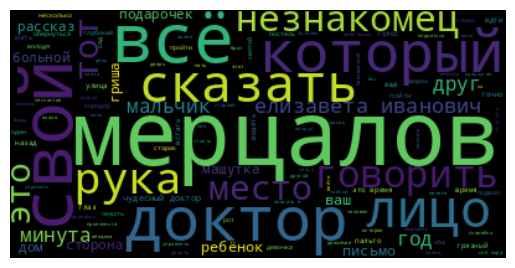

Ночная Смена
Лексическое разнообразие: 32.35627301047862


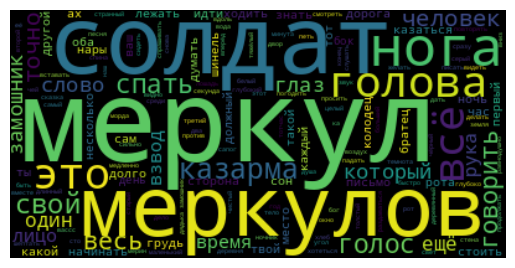

Белый Пудель
Лексическое разнообразие: 29.9592099613568


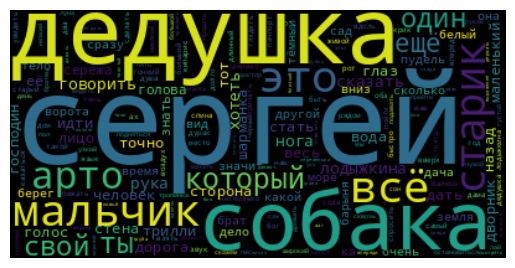

Поединок
Лексическое разнообразие: 13.678400954653938


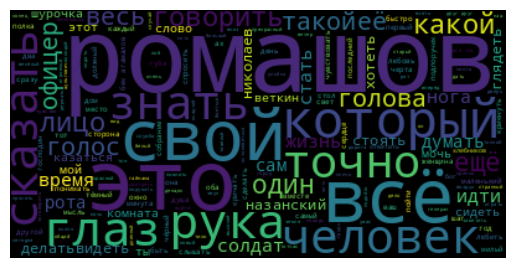

Изумруд
Лексическое разнообразие: 35.35969709718132


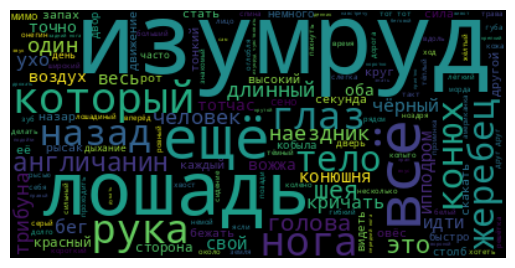

Гранатовый Браслет
Лексическое разнообразие: 25.5370096485668


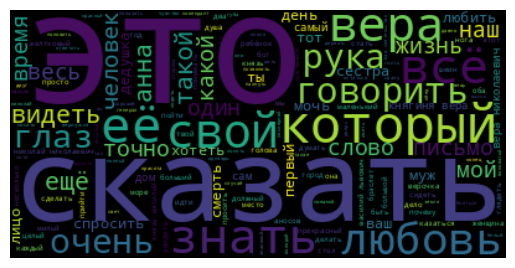

Анафема
Лексическое разнообразие: 47.645788336933045


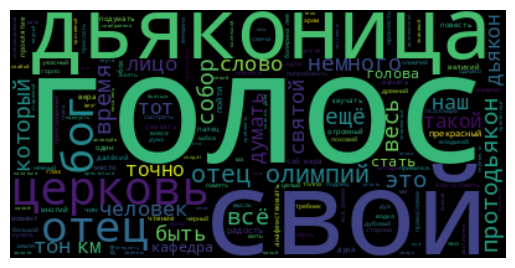

Звезда Соломона
Лексическое разнообразие: 24.987571226433133


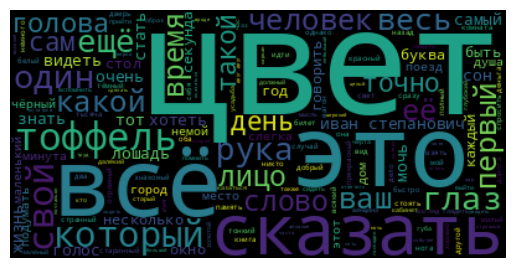

Лимонная Корка
Лексическое разнообразие: 46.821631878557874


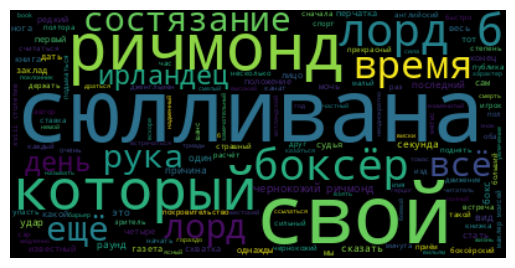

Синяя Звезда
Лексическое разнообразие: 36.55784925588094


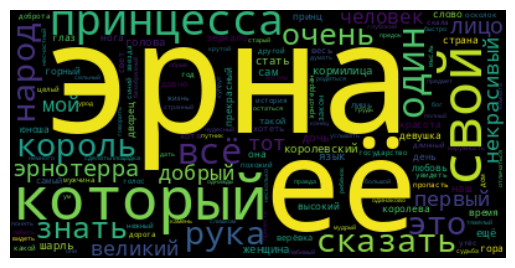

In [15]:
stop = stopwords.words("russian")

for name, tokenized in kuprin.items():
    words = [pair[0] for pair in tokenized] 
    words_w_stop = [morph.parse(pair[0])[0].normal_form for pair in tokenized if pair[0] not in stop]
    POSes = [pair[1] for pair in tokenized]
    print(name)

    print(f"Лексическое разнообразие: {(len(set([morph.parse(word)[0].normal_form for word in words])) / len(words)) * 100}")

    unique_words = []
    for word in words_w_stop:
        if word not in unique_words:
            unique_words.append(word)
    word_count = {}
    for uw in unique_words:
        word_count.update({uw: words.count(uw)})
    fig = px.scatter(x=sorted(word_count.keys(), reverse=True)[:10], y=sorted(word_count.values(), reverse=True)[:10])
    fig.show()

    unique_pos = []
    for pos in POSes:
        if pos not in unique_pos:
            unique_pos.append(pos)
    pos_count = {}
    for up in unique_pos:
        pos_count.update({up: POSes.count(up)})
    fig = px.scatter(x=pos_count.keys(), y=pos_count.values())
    fig.show()

    wordcloud_doc = WordCloud().generate(" ".join(words_w_stop))

    plt.imshow(wordcloud_doc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Выводы:
- С 1900 по 1907 видно падение лексического разнообразия ("Белый Пудель", "Поединок"), которое позже повторялось в 1910 ("Гранатовый Браслет") и 1917 ("Звезда Соломона") годах. Такие падения, впрочем, характерно для литературных жанров рассказа и повести, а также направлений романтизма и реализма, в которых написаны эти произведения. 
- На абсолютном большинстве графиков по частям речи превалируют существительные, прилагательные, глаголы и (не всегда, но часто) наречия, а сама лексика (судя по облакам слов) не пестрит особым разнообразием — всё точно так же упирается в жанры и направления Куприна.
- К концу своей писательской карьеры (начиная с "Лимонной корки") заметен прирост в использовании таких частей речи как причастия, деепричастия и краткие прилагательные. Лексическое разнообразие с тех пор стабилизировалось.

## Предобработка, TF-IDF и косинусное расстояние текстов

In [16]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('ru_core_news_sm')
import numpy as np
# from sklearn import 

stop = stopwords.words("russian")

In [17]:
class DIYPreProcessor:

    def pre_process(self, text: str) -> list:
        doc = nlp(text)
        return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

    def tf(self, word: str, text: list) -> float:
        return text.count(word)/len(text) 

    def idf(self, word: str, collection: list) -> float:
        try:
            return np.log(len(collection)/len([doc for doc in collection if word in doc]))
        except ZeroDivisionError as e:
            print("Слово не найдено ни в одном документе из корпуса!")
            return  

    def word_to_vector(self, word: str, text: list, collection: list) -> float:        
        try:
            new_collection = []
            for doc in collection:
                new_collection.append(self.pre_process(doc))
            return self.tf(word, self.pre_process(text))*self.idf(word, new_collection)
        except TypeError as e:
            return "Такого слова в корпусе не найдено!"

    def similarity(self, text_a: list, text_b: list, corpus: list) -> float:            # Так, и что теперь с этим делать? 
        text_a, text_b = [set([self.word_to_vector(word, text_a, corpus) for word in text_a])], [set([self.word_to_vector(word, text_b, corpus) for word in text_b])]
        return f"{np.dot(text_a, text_b)/(np.linalg.norm(text_a)*np.linalg.norm(text_b)):.5}"

    def word2vec_process(self, text: str) -> list:
        res = []
        for sentence in list(nlp(text).sents):
            res.append([word.lemma_ for word in sentence if not word.is_stop and str(word).isalpha()])
        return res

In [18]:
dpp = DIYPreProcessor()

In [19]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin_vec = {}

for path, name in files.items():
    with open(path, "r") as f:
        kuprin_vec.update({name: f.read()})

In [20]:
f'TF-IDF = {dpp.word_to_vector("старик", kuprin_vec["Белый Пудель"], kuprin_vec.values()):.5}'

'TF-IDF = 0.0026295'

In [21]:
f'TF-IDF = {dpp.word_to_vector("пачпорт", kuprin_vec["Белый Пудель"], kuprin_vec.values()):.5}'

'TF-IDF = 0.0024251'

In [22]:
f'TF-IDF = {dpp.word_to_vector("изумруд", kuprin_vec["Изумруд"], kuprin_vec.values()):.5}'

'TF-IDF = 0.056523'

In [23]:
f'TF-IDF = {dpp.word_to_vector("пассат-б4", kuprin_vec["Поединок"], kuprin_vec.values())}'        # Ну, такого слова в корпусе точно нет)

Слово не найдено ни в одном документе из корпуса!


'TF-IDF = Такого слова в корпусе не найдено!'

## Word Embeddings

In [24]:
pip install -Uq gensim

Note: you may need to restart the kernel to use updated packages.


In [25]:
from gensim.models import Word2Vec, KeyedVectors
from itertools import combinations

In [26]:
{name:len(doc) for name, doc  in kuprin_vec.items()}

{'Чудесный Доктор': 17042,
 'Ночная Смена': 46690,
 'Белый Пудель': 61439,
 'Поединок': 440312,
 'Изумруд': 31451,
 'Гранатовый Браслет': 92452,
 'Анафема': 15454,
 'Звезда Соломона': 175351,
 'Лимонная Корка': 14389,
 'Синяя Звезда': 27555}

In [27]:
min([len(doc) for doc in kuprin_vec.values()])

14389

#### Самый маленький текст — "Лимонная Корка"

In [28]:
lemon_model = Word2Vec(sentences=dpp.word2vec_process(kuprin_vec["Лимонная Корка"]), min_count=1)

In [29]:
for index, word in enumerate(lemon_model.wv.index_to_key):
    if index == 100:
        break
    print(f"word #{index}/{len(lemon_model.wv.index_to_key)} is {word}")

word #0/859 is лорд
word #1/859 is сюлливан
word #2/859 is ричмонд
word #3/859 is боксёр
word #4/859 is время
word #5/859 is чернокожий
word #6/859 is рука
word #7/859 is сюлливана
word #8/859 is состязание
word #9/859 is день
word #10/859 is ирландец
word #11/859 is секунда
word #12/859 is три
word #13/859 is раунд
word #14/859 is бокс
word #15/859 is вид
word #16/859 is ричмонда
word #17/859 is причина
word #18/859 is последний
word #19/859 is сказать
word #20/859 is известный
word #21/859 is удар
word #22/859 is раз
word #23/859 is два
word #24/859 is первый
word #25/859 is заклад
word #26/859 is четыре
word #27/859 is упасть
word #28/859 is судья
word #29/859 is нога
word #30/859 is лицо
word #31/859 is конец
word #32/859 is газета
word #33/859 is редкий
word #34/859 is перчатка
word #35/859 is положение
word #36/859 is книга
word #37/859 is дать
word #38/859 is степень
word #39/859 is малый
word #40/859 is час
word #41/859 is игрок
word #42/859 is боксёрский
word #43/859 is спорт


In [30]:
lemon_model.wv.most_similar('состязание')

[('пэр', 0.3314712345600128),
 ('хороший', 0.33071860671043396),
 ('упасть', 0.2874544858932495),
 ('челюсть', 0.2833007276058197),
 ('чувствительность', 0.2791145145893097),
 ('холодный', 0.2745794355869293),
 ('существование', 0.26202377676963806),
 ('вмешательство', 0.2542375922203064),
 ('моисей', 0.24210043251514435),
 ('вырвать', 0.23078195750713348)]

In [31]:
lemon_model.wv.most_similar('друг')

[('пьери', 0.29446589946746826),
 ('считаться', 0.28757336735725403),
 ('вскоре', 0.2663081884384155),
 ('арбитр', 0.26157641410827637),
 ('оба', 0.24584047496318817),
 ('сторона', 0.24202385544776917),
 ('окончательный', 0.2364805042743683),
 ('противник', 0.2320907711982727),
 ('достаточный', 0.2303580790758133),
 ('обидчик', 0.22205644845962524)]

In [32]:
lemon_model.wv.most_similar(positive=['боксёр', 'лорд'], negative=['рука'])

[('торопить', 0.2588077783584595),
 ('облагодетельствованному', 0.25243937969207764),
 ('основать', 0.24920983612537384),
 ('граф', 0.2454991191625595),
 ('исключительный', 0.24284593760967255),
 ('свистками', 0.2360842376947403),
 ('скупой', 0.2339899241924286),
 ('найти', 0.23244276642799377),
 ('отправить', 0.2268584966659546),
 ('несколько', 0.22242209315299988)]

In [33]:
lemon_model.wv.most_similar(positive=['книга', 'лимон'], negative=['автор'])

[('достаточный', 0.3040359616279602),
 ('доска', 0.2960810363292694),
 ('войти', 0.26038652658462524),
 ('полиция', 0.25026944279670715),
 ('свистками', 0.22814802825450897),
 ('фамилия', 0.22649770975112915),
 ('раса', 0.22558027505874634),
 ('мятный', 0.21597720682621002),
 ('миля', 0.2121838629245758),
 ('отправить', 0.20540311932563782)]

In [34]:
lemon_vocabulary = lemon_model.wv.index_to_key
pairs = combinations(lemon_vocabulary, 2)
pair_similiarity = [(lemon_model.wv.similarity(pair[0], pair[1]), pair) for pair in pairs]
top_10_pairs = sorted(pair_similiarity, reverse=True)[:10]
top_10_pairs

[(0.4205295, ('перерыв', 'неоднократно')),
 (0.40476936, ('похожий', 'жадность')),
 (0.3959726, ('игрок', 'ревность')),
 (0.3958997, ('начинать', 'тяжело')),
 (0.3929588, ('генрих', 'выпад')),
 (0.39139158, ('привлекательный', 'мудрый')),
 (0.38826913, ('разобраться', 'грубый')),
 (0.38769227, ('взаимный', 'находчивость')),
 (0.38681668, ('кровь', 'состояние')),
 (0.38670498, ('столетие', 'червяк'))]